# the-nature-conservancy-fisheries-monitoring

In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import ResNet50

In [ ]:
InceptionV3().summary()
InceptionV3().get_config()
InceptionV3(include_top=False).summary()

In [ ]:
VGG19().summary()
VGG19().get_config()
VGG19(include_top=False).summary()

In [ ]:
ResNet50().summary()
ResNet50().get_config()
ResNet50(include_top=False).summary()

In [1]:
import os
import numpy as np
from skimage.io import imread, imsave
from skimage.transform import resize
from skimage import img_as_float
from skimage.exposure import equalize_adapthist
from skimage.util import pad
import pickle
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
image_size = 299
classes = ['ALB', 'BET', 'DOL', 'LAG', 'NoF', 'OTHER', 'SHARK', 'YFT']
size_valid = 0.2

In [3]:
X_train_files = {}
ntrain = 0
for c in classes:
    X_train_files[c] = os.listdir("./train/{}/".format(c))
    print("{}: {}".format(c, len(X_train_files[c])))
    ntrain += len(X_train_files[c])
print("total: ", ntrain)
print(X_train_files['BET'][0])
print("nbre de classe: ",len(X_train_files))


ALB: 1719
BET: 200
DOL: 117
LAG: 67
NoF: 465
OTHER: 299
SHARK: 176
YFT: 734
total:  3777
img_04048.jpg
nbre de classe:  8


(720, 1280, 3)
uint8


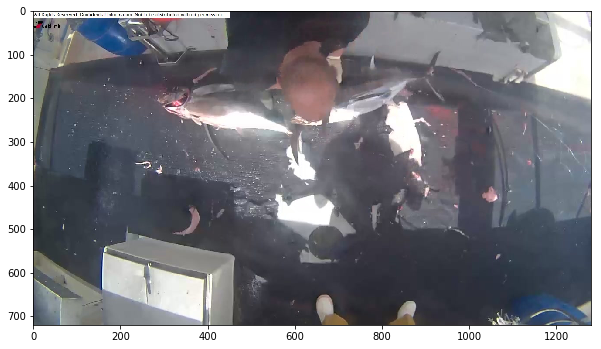

In [4]:
image = imread("./train/BET/img_04048.jpg")
print(image.shape)
print(image.dtype)
plt.figure(figsize=(10,10))
plt.imshow(image)

In [6]:
from skimage.exposure import equalize_adapthist

i = 0
for c in classes:
    for file in X_train_files[c]:
        image = imread("./train/{}/{}".format(c, file))
        if image.shape[0] < image.shape[1]:
            padding = (image.shape[1]-image.shape[0])//2
            image = pad(image, ((padding,),(0,),(0,)), 'constant')
        if image.shape[0] > image.shape[1]:
            padding = (image.shape[0]-image.shape[1])//2
            image = pad(image, ((0,),(padding,),(0,)), 'constant')
        if image.shape[0] != image_size or image.shape[1] != image_size:
            image = resize(image, (image_size, image_size)).astype(np.float32)
            image = equalize_adapthist(image).astype(np.float32)
            imsave("./train/{}/{}".format(c, file), image)
    print('*', end=' ')

* * * * * * * * 

(299, 299, 3)
uint8


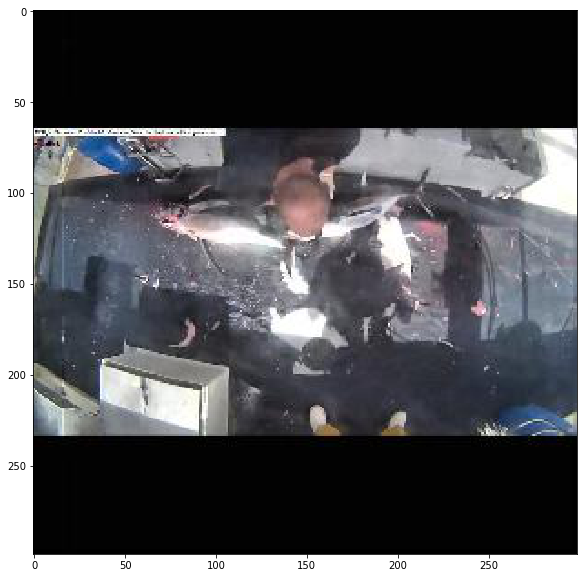

In [7]:
image = imread("./train/BET/img_04048.jpg")
print(image.shape)
print(image.dtype)
plt.figure(figsize=(10,10))
plt.imshow(image)

In [8]:
from skimage import img_as_float
from skimage.color import rgb2hsv

def preprocess(images_data):
    #for image in images_data:
     #   clahe.append(equalize_adapthist(image).astype(np.float32))
     #   hsv.append(rgb2hsv(image).astype(np.float32))
    images_data = img_as_float(images_data).astype(np.float32)
    #return np.array(hsv) - 0.5
    return images_data - 0.5
    


(299, 299, 3)
uint8
mean: 63.394656286469576 std: 69.16480699124742 min: 0 max: 255
(1, 299, 299, 3)
float32
mean: -0.25139352679252625 std: 0.27123454213142395 min: -0.5 max: 0.5


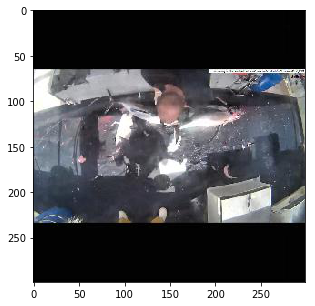

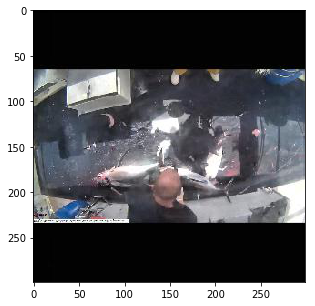

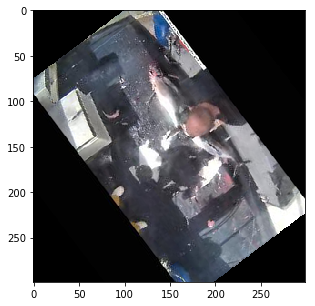

In [9]:
from scipy.ndimage.interpolation import rotate
from random import randint

image = imread("./train/BET/img_04048.jpg")
print(image.shape)
print(image.dtype)
plt.figure(figsize=(5,5))
plt.imshow(np.fliplr(image))

plt.figure(figsize=(5,5))
plt.imshow(np.flipud(image))

plt.figure(figsize=(5,5))
plt.imshow(rotate(image, randint(1, 360), reshape=False))

print('mean: {} std: {} min: {} max: {}'.format(image.mean(), image.std(), image.min(), image.max()))

image = image.reshape(1, image_size, image_size, 3)

image = preprocess(image)
print(image.shape)
print(image.dtype)
print('mean: {} std: {} min: {} max: {}'.format(image.mean(), image.std(), image.min(), image.max()))



In [10]:
from random import shuffle
X_train_files = {}
for c in classes:
    X_train_files[c] = []
    files = os.listdir("./train/{}/".format(c))
    for file in files:
        if not ('lr' in file or 'ud' in file or 'ro' in file): 
            X_train_files[c].append(file)
        

X_valid_files = {}
nvalid = 0
ntrain = 0
ntotal = 0
for c in classes:
    shuffle(X_train_files[c])
    X_valid_files[c] = X_train_files[c][:int(len(X_train_files[c])*size_valid)]
    X_train_files[c] = X_train_files[c][int(len(X_train_files[c])*size_valid):]
    print("Valid, {}: {}".format(c, len(X_valid_files[c])))
    print("Train, {}: {}".format(c, len(X_train_files[c])))
    ntrain += len(X_train_files[c])
    nvalid += len(X_valid_files[c])
    ntotal += len(X_train_files[c]) + len(X_valid_files[c])
print()
print("total train: ", ntrain)
print("total valid: ", nvalid)
print("total: ", ntotal)

assert ntotal == 3777, "erreur"


Valid, ALB: 343
Train, ALB: 1376
Valid, BET: 40
Train, BET: 160
Valid, DOL: 23
Train, DOL: 94
Valid, LAG: 13
Train, LAG: 54
Valid, NoF: 93
Train, NoF: 372
Valid, OTHER: 59
Train, OTHER: 240
Valid, SHARK: 35
Train, SHARK: 141
Valid, YFT: 146
Train, YFT: 588

total train:  3025
total valid:  752
total:  3777


In [11]:
from scipy.ndimage.interpolation import rotate
from random import randint
import os.path

X_train_files_big = {}

for c in classes:
    X_train_files_big[c] = list(X_train_files[c])
    if c != 'ALB':
        for file in X_train_files[c]:
            if not os.path.exists("./train/{}/lr{}".format(c, file)):
                image = imread("./train/{}/{}".format(c, file))
                image = np.fliplr(image)
                imsave("./train/{}/lr{}".format(c, file), image)
            X_train_files_big[c].append("lr{}".format(file))
        
            if not os.path.exists("./train/{}/ud{}".format(c, file)):
                image = imread("./train/{}/{}".format(c, file))
                image = np.flipud(image)
                imsave("./train/{}/ud{}".format(c, file), image)
            X_train_files_big[c].append("ud{}".format(file))
        
            if not os.path.exists("./train/{}/ro{}".format(c, file)):
                image = imread("./train/{}/{}".format(c, file))
                image = rotate(image, randint(1, 360), reshape=False)
                imsave("./train/{}/ro{}".format(c, file), image)
            X_train_files_big[c].append("ro{}".format(file))
        
        print('*', end=' ')
        

        
print()
ntrain = 0
for c in classes:
    print("{}: {}".format(c, len(X_train_files_big[c])))
    ntrain += len(X_train_files_big[c])
print("total: ", ntrain)
print("nbre de classe: ",len(X_train_files_big))
print()
print("length of initial X_train_files:")
ntrain = 0
for c in classes:
    print("{}: {}".format(c, len(X_train_files[c])))
    ntrain += len(X_train_files[c])
print("total: ", ntrain)             

* * * * * * * 
ALB: 1376
BET: 640
DOL: 376
LAG: 216
NoF: 1488
OTHER: 960
SHARK: 564
YFT: 2352
total:  7972
nbre de classe:  8

length of initial X_train_files:
ALB: 1376
BET: 160
DOL: 94
LAG: 54
NoF: 372
OTHER: 240
SHARK: 141
YFT: 588
total:  3025


(299, 299, 3)
uint8


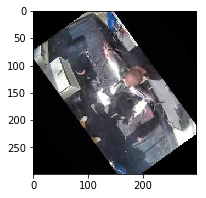

In [12]:
image = imread("./train/BET/roimg_04048.jpg")
print(image.shape)
print(image.dtype)
plt.figure(figsize=(3,3))
plt.imshow(image)

In [13]:
# One Hot encode the labels to the variable y_one_hot
from keras.utils.np_utils import to_categorical
def binary(y):
    y_binary = to_categorical(y).astype(np.float32)
    return y_binary

Using TensorFlow backend.


In [32]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
from keras.optimizers import Adam
from keras.layers import Input
from keras.layers.core import Dropout
from keras.layers.core import Flatten


base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x) 
x = Dropout(0.5)(x)
#x = Dense(512, activation='relu')(x)
#x = Dropout(0.5)(x)
predictions = Dense(8, activation='softmax')(x)

"""base_model = VGG19(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)"""


"""base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
x = base_model.output
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)"""

# this is the model we will train
model = Model(input=base_model.input, output=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in model.layers[:172]:
    layer.trainable = False
for layer in model.layers[172:]:
    layer.trainable = True

# compile the model (should be done *after* setting layers to non-trainable)
model.compile('adam', 'categorical_crossentropy', ['accuracy'])



In [15]:
# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(model.layers):
   print(i, layer.name)

model.summary()

0 input_1
1 convolution2d_1
2 batchnormalization_1
3 convolution2d_2
4 batchnormalization_2
5 convolution2d_3
6 batchnormalization_3
7 maxpooling2d_1
8 convolution2d_4
9 batchnormalization_4
10 convolution2d_5
11 batchnormalization_5
12 maxpooling2d_2
13 convolution2d_9
14 batchnormalization_9
15 convolution2d_7
16 convolution2d_10
17 batchnormalization_7
18 batchnormalization_10
19 averagepooling2d_1
20 convolution2d_6
21 convolution2d_8
22 convolution2d_11
23 convolution2d_12
24 batchnormalization_6
25 batchnormalization_8
26 batchnormalization_11
27 batchnormalization_12
28 mixed0
29 convolution2d_16
30 batchnormalization_16
31 convolution2d_14
32 convolution2d_17
33 batchnormalization_14
34 batchnormalization_17
35 averagepooling2d_2
36 convolution2d_13
37 convolution2d_15
38 convolution2d_18
39 convolution2d_19
40 batchnormalization_13
41 batchnormalization_15
42 batchnormalization_18
43 batchnormalization_19
44 mixed1
45 convolution2d_23
46 batchnormalization_23
47 convolution2d_

In [16]:
def construct_train_files(X_train_files):
    X_training_files = []
    y_training_bin = []
    loss_image = []
    bin = binary(range(len(classes)))

    for y, c in enumerate(classes):
        for file in X_train_files[c]:
            X_train_image = imread("./train/{}/{}".format(c, file)).reshape(-1, image_size, image_size, 3 )
            X_train_image = preprocess(X_train_image)
            y_bin_image = bin[y].reshape(-1,8)
            X_training_files = np.append(X_training_files, ["{}/{}".format(c, file)])
            y_training_bin.append( y_bin_image)
        print('*', end=' ')
        
    
    y_training_bin = np.array(y_training_bin).reshape(-1,8)
    print()
    
    return X_training_files, y_training_bin


In [17]:

def read_X_train(X_files):
    X_train =[]
    for file in X_files:
        image = imread("./train/{}".format(file))
        X_train.append(image)
    X_train = np.array(X_train)
    X_train = preprocess(X_train)
    return X_train


In [26]:
from sklearn.utils import shuffle as shouff

def train_generator (X_files, y, batch_size):
    step = len(X_files)//batch_size
    while 1:
        X_files, y = shouff(X_files, y)
        for i in range(step):
            loss_image = []
            X_batch = read_X_train(X_files[i*batch_size:(i+1)*batch_size])
            y_batch = y[i*batch_size:(i+1)*batch_size]
            #for j in range(batch_size):
            #    loss, acc = model.test_on_batch(X_batch[j].reshape(-1, image_size, image_size, 3 ), y_batch[j].reshape(-1,8))
            #    loss_image = np.append(loss_image, [loss])
            yield (X_batch, y_batch)

In [27]:
def batch_valid(X_valid_files, classes):
    X_valid =[]
    y_valid = []
    for y, c in enumerate(classes):
        for file in X_valid_files[c]:
            image = imread("./train/{}/{}".format(c, file))
            X_valid.append(image)
            y_valid.append(y)
    X_valid = np.array(X_valid)
    y_valid = np.array(y_valid).astype(np.uint8)
    X_valid = preprocess(X_valid)
    return X_valid, y_valid

In [28]:
X_valid, y_valid = batch_valid(X_valid_files, classes)
y_binary = binary(y_valid)

In [29]:
batch_size = 32

## training Loop

In [30]:
from keras.models import load_model
from sklearn.utils import shuffle as shouff
import os.path

"""if os.path.exists('./my_model.h5'):
    model = load_model('my_model.h5')
    print('model loaded')"""

X_training_files, y_training = construct_train_files(X_train_files_big)

print("X shape: {}".format(X_training_files.shape))
print("X type: {}".format(X_training_files.dtype))
print("y shape: {}".format(y_training.shape))
print("y type: {}".format(y_training.dtype))
#print("loss weight shape: {}".format(loss_weight.shape))
#print("loss weight type: {}".format(loss_weight.dtype))

* * * * * * * * 
X shape: (7972,)
X type: <U32
y shape: (7972, 8)
y type: float32


In [33]:
#step = len(X_training_files)//64
#res = len(X_training_files)%64
#fin = 0

history = model.fit_generator(generator = train_generator(X_training_files, y_training, batch_size),
                              samples_per_epoch = len(X_training_files),
                              validation_data = (X_valid, y_binary),
                              nb_epoch = 7, verbose = 2)  


Epoch 1/7
319s - loss: 0.5977 - acc: 0.8160 - val_loss: 0.2957 - val_acc: 0.9016
Epoch 2/7
312s - loss: 0.1435 - acc: 0.9555 - val_loss: 0.3715 - val_acc: 0.9016
Epoch 3/7
313s - loss: 0.1047 - acc: 0.9660 - val_loss: 0.3345 - val_acc: 0.9335
Epoch 4/7
313s - loss: 0.0699 - acc: 0.9795 - val_loss: 0.3552 - val_acc: 0.9029
Epoch 5/7
312s - loss: 0.0625 - acc: 0.9795 - val_loss: 0.2582 - val_acc: 0.9362
Epoch 6/7
314s - loss: 0.0396 - acc: 0.9874 - val_loss: 0.1962 - val_acc: 0.9495
Epoch 7/7
312s - loss: 0.0468 - acc: 0.9869 - val_loss: 0.3757 - val_acc: 0.9109


In [34]:
n_valid_c = 0
    

for y, c in enumerate(classes):
    X_val_c = X_valid[n_valid_c:n_valid_c + len(X_valid_files[c])]
    y_bin_c = y_binary[n_valid_c:n_valid_c + len(X_valid_files[c])]
    n_valid_c += len(X_valid_files[c])
    loss, acc = model.evaluate(X_val_c, y_bin_c, verbose = 2)
    print("{}- loss: {} accuracy:{}".format(c, loss, acc))

print()

loss, acc = model.evaluate(X_valid, y_binary, verbose = 2)
print("total- loss: {} accuracy:{}".format(loss, acc))


ALB- loss: 0.3100725732548244 accuracy:0.9037900874635568
BET- loss: 0.6989632026758045 accuracy:0.875
DOL- loss: 0.34048476815223694 accuracy:0.95652174949646
LAG- loss: 0.5230374336242676 accuracy:0.9230769872665405
NoF- loss: 0.10951368895269209 accuracy:0.9677419297156795
OTHER- loss: 0.13542903795585795 accuracy:0.9491525524753636
SHARK- loss: 0.0014574174869007297 accuracy:1.0
YFT- loss: 0.7901806602739307 accuracy:0.8561643819286399

total- loss: 0.3757134602266423 accuracy:0.910904255319149


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


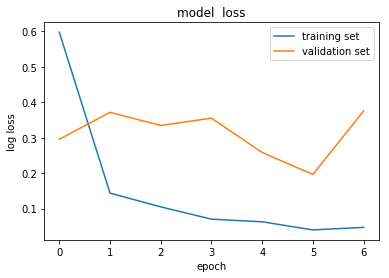

In [35]:
print(history.history.keys())

### plot the training and validation loss for each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model  loss')
plt.ylabel('log loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()

In [ ]:
model.save('my_model.h5'.format(epoch))

## end of training loop

In [ ]:
from keras.models import load_model
# load the good one model
model = load_model('my_model.h5')
model.evaluate(X_valid, y_binary, verbose = 2)

In [ ]:
losses_bis = list(loss_weight)
fig = plt.figure(figsize=(15,40))
fig.suptitle('Worst image')
worst_image = []
for i in range(1,11): 
    im_index = np.argmax(losses_bis)
    im = plt.subplot(5,2,i)
    im.set_title('{}'.format(X_training_files[im_index]))
    plt.imshow(imread("./train/{}".format(X_training_files[im_index])))
    losses_bis[im_index] -= 1000

    

In [ ]:
X_test_files = os.listdir("./test_stg1/")
print(X_test_files[0])
print(len(X_test_files))

X_test_files.sort()
print()
print(X_test_files[0])
print(X_test_files[-1])

In [ ]:
i = 0
for file in X_test_files:
    image = imread("./test_stg1/{}".format(file))
    if image.shape[0] < image.shape[1]:
        padding = (image.shape[1]-image.shape[0])//2
        image = pad(image, ((padding,),(0,),(0,)), 'constant')
    if image.shape[0] > image.shape[1]:
        padding = (image.shape[0]-image.shape[1])//2
        image = pad(image, ((0,),(padding,),(0,)), 'constant')
    image = resize(image, (image_size, image_size)).astype(np.float32)
    image = equalize_adapthist(image).astype(np.float32)
    imsave("./test_stg1/{}".format(file), image)
    i += 1
    if i%100 == 0:
        print('*', end=' ')
        


In [ ]:
image = imread("./test_stg1/{}".format(X_test_files[0]))
print(image.shape)
print(image.dtype)
plt.figure(figsize=(3,3))
plt.imshow(image)

In [ ]:
X_test =[]
for file in X_test_files[:500]:
    image = imread("./test_stg1/{}".format(file))
    X_test.append(image)
X_test = np.array(X_test)
X_test = preprocess(X_test)

print(X_test.shape)
print(X_test.dtype)
print('mean: {} std: {} min: {} max: {}'.format(X_test.mean(), X_test.std(), X_test.min(), X_test.max()))

In [ ]:
step = 10
predict = []

for i in range(len(X_test_files)//step):
    X_test = []
    for file in X_test_files[0+i*step:step+i*step]:
        image = imread("./test_stg1/{}".format(file))
        X_test.append(image)
    X_test = np.array(X_test)
    X_test = preprocess(X_test)
    predict.append(model.predict(X_test))
    print('*', end=' ')
print()
print(predict)
print(len(predict))

In [ ]:
predict = np.array(predict)
predict = predict.reshape(-1,8)
print(predict.shape)

In [ ]:
import csv
with open("My_submission{}.csv".format(epoch), "w") as csvfile:
    writer = csv.writer(csvfile, lineterminator='\n')
    writer.writerow(['image', 'ALB', 'BET', 'DOL', 'LAG', 'NoF', 'OTHER', 'SHARK', 'YFT'])
    for i, file in enumerate(X_test_files):
        writer.writerow([file, predict[i][0], predict[i][1], predict[i][2], predict[i][3],
                         predict[i][4], predict[i][5], predict[i][6], predict[i][7]])
